In [1]:
import sys
import os
import numpy as np
import pandas as pd
import gmaps
import matplotlib.pyplot as plt
from matplotlib.pylab import subplots
from Fire_helpers import csv_to_df, df_to_heatmap
from settings_ECE180 import GOOGLE_API_KEY, data_path

%matplotlib inline
# Use this to set the env api key
os.environ['GOOGLE_API_KEY']= GOOGLE_API_KEY
gmaps.configure(api_key=os.getenv('GOOGLE_API_KEY'))

In [2]:
# load data and plot for a single month (confirm geolocation)
fname = 'FIRE_2016-08.csv'

df = pd.read_csv(os.path.join(data_path,'MM_CA',fname))
df_to_heatmap(df)

Figure()

In [10]:
# create dataframe
tt = []
mag_mean = []
mm = []
yy = []

for dirpath, dnames, fnames in os.walk(os.path.join(data_path,'MM_CA')):
    for f in fnames:
        if f.endswith(".csv"):
            # load data
            df = pd.read_csv(os.path.join('.','data/MM_CA',f))
            # get rid of land mask (replace 0.1 with 0, because 0.1 represents land values)
            df['mag'].replace(0.1,0, inplace=True)
            # Calculate mean values
            mag_mean.append(df['mag'].mean())
            # time
            tt.append(pd.to_datetime(f[-11:-4]+'-15'))
            mm.append(int(f[-6:-4]))
            yy.append(f[-11:-7])

# print mag_mean
MM_df = pd.DataFrame({'tt':tt,'mm':mm,'yy':yy,'mag_mean':mag_mean})
MM_df = MM_df.set_index('tt')
MM_df.sort_index(inplace=True)
print MM_df.head()

            mag_mean  mm    yy
tt                            
2000-03-15  0.021227   3  2000
2000-04-15  0.029666   4  2000
2000-05-15  0.009842   5  2000
2000-06-15  0.024945   6  2000
2000-07-15  0.127845   7  2000


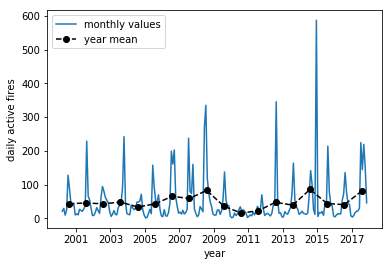

In [19]:
# Create a groupby variable that groups mag_mean by year
groupby_yy = MM_df['mag_mean'].groupby(MM_df['yy'])
tt_yy = pd.to_datetime(groupby_yy.mean().index + '-08-01')
mean_yy = groupby_yy.mean()

# conversion factor
cf = 1000.

# plot time-series
fig,ax=subplots()
ax.plot(MM_df.index,MM_df.mag_mean*cf,'-')
ax.plot(tt_yy,mean_yy*cf,'--ok')
ax.set_xlabel('year')
ax.set_ylabel('daily active fires')
ax.legend(('monthly values','year mean'),loc='best')


# The range (0, 30) represents a count of the number of fires 
# observed within a 1,000-square-kilometer area. 
# A value of 30 shows the high end of the count — as many as 30 
# fires in a 1,000-square-kilometer area per day, while a value 
# of 0 shows as few as 0 fires in a 1,000-square-kilometer area per day.

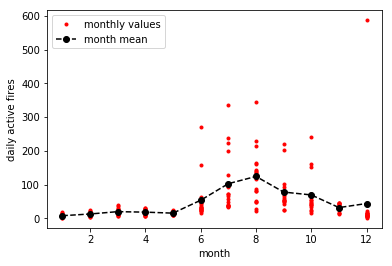

In [20]:
# Create a groupby variable that groups mag_mean by year
groupby_mm = MM_df['mag_mean'].groupby(MM_df['mm'])
tt_mm = groupby_mm.mean().index.values
mean_mm = groupby_mm.mean()

fig,ax=subplots()
ax.plot(MM_df.mm.values,MM_df.mag_mean*cf,'.r')
ax.plot(tt_mm,mean_mm*cf,'--ok')
ax.set_xlabel('month')
ax.set_ylabel('daily active fires')
ax.legend(('monthly values','month mean'),loc='best')
